In [1]:
import numpy as np
import museum as museum
import matplotlib.pyplot as plt
import pandas as pd

museums_df = museum.fetch_data()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Reading data fromd csv
Data loaded form persistence store


coefficient (b1) is: [0.00523402]
constant is (b0) is: 3617404.8989863642
R squared is 0.0005291035433573343
p_value 0.8688668707346969 is not satistically significant
Root Mean Squares Error is 1615962.424590446


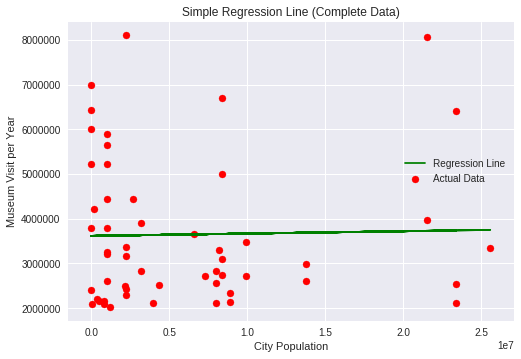

In [2]:
variable = 'population'
city_pop = museums_df[variable].values
museum_visit = museums_df['nb_visitor_per_year'].values
museum_visit_prediction = museum.create_and_plot_regression_model(city_pop, museum_visit)

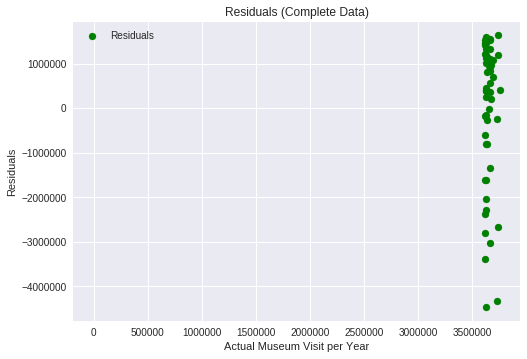

In [3]:
museum.plot_residuals(museum_visit, museum_visit_prediction)

coefficient (b1) is: [-0.04859877]
constant is (b0) is: 3533815.5040311026
R squared is 0.04594792079344068
p_value 0.16749335333943735 is not satistically significant


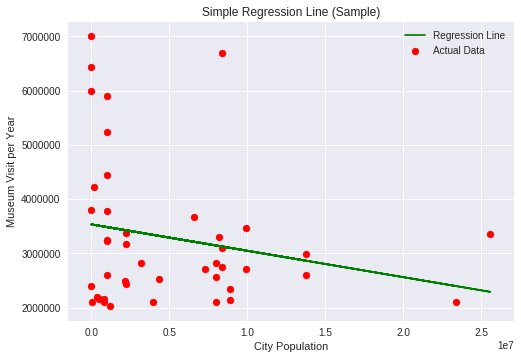

In [4]:
  sample = museums_df.sample(frac=0.8, random_state=1)
  test_sample = museums_df.drop(sample.index)
  city_pop = sample[variable].values
  museum_visit = sample['nb_visitor_per_year'].values

  reg = museum.do_simple_linear_regression(city_pop, museum_visit)
  museum.check_and_compute_p_value(city_pop, museum_visit)
  
  y_pred = museum.plot_simple_regression(city_pop, museum_visit, reg, 'Simple Regression Line (Sample)')

In [5]:
prediction = pd.DataFrame(test_sample[['museum','city','nb_visitor_per_year'] + [variable]])
to_predict = prediction[variable].values
to_predict = to_predict.reshape(len(to_predict), 1)
prediction['predicted_visits'] = reg.predict(to_predict)
prediction['residuals'] = prediction.apply(lambda row: row.nb_visitor_per_year - row.predicted_visits, axis=1)
prediction['residuals %'] = prediction.apply(lambda row: row.residuals/row.nb_visitor_per_year*100, axis=1)
print("Predictions on test sample")
print(prediction)

Predictions on test sample
                                    museum              city  \
0                                   Louvre             Paris   
1                 National Museum of China           Beijing   
5   Shanghai Science and Technology Museum          Shanghai   
8                              Tate Modern            London   
9                  National Gallery of Art  Washington, D.C.   
11      American Museum of Natural History     New York City   
12                  National Palace Museum            Taipei   
15     China Science and Technology Museum           Beijing   
16                             Reina Sofía            Madrid   
37                        China Art Museum          Shanghai   
43       Houston Museum of Natural Science           Houston   

    nb_visitor_per_year  population  predicted_visits     residuals  \
0               8100000     2240621      3.424924e+06  4.675076e+06   
1               8062625    21516000      2.488164e+06  5.57446

In [6]:
museum.multiple_linear_regression_prediction(museums_df, ['population', 'is_art_museum', 'is_national_museum', 'is_science_museum', 'is_nat_history_museum', 'nb_of_interesting_type','has_public_transit'])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.307
Date:                Tue, 22 Jan 2019   Prob (F-statistic):              0.279
Time:                        16:06:45   Log-Likelihood:                -663.19
No. Observations:                  43   AIC:                             1340.
Df Residuals:                      36   BIC:                             1353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.86